In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
#from sklearn.model_selection import GridSearchCV
#from sklearn import ensemble
from sklearn.metrics import accuracy_score
import dabl
import warnings
warnings.filterwarnings("ignore")
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
resultsDF = pd.read_csv('results.csv')
circuitsDF = pd.read_csv('circuits.csv')
driversDF = pd.read_csv('drivers.csv')
racesDF = pd.read_csv('races.csv')
constructorDF = pd.read_csv('constructors.csv')


In [4]:
resultsDF.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1  
3         58    7       1:28.603         215.464         1  
4         43    1       1:27.418         218.385         1

In [5]:
resultsDF.tail()

resultId  raceId  driverId  constructorId number  grid position  \
25455     25461    1076       849              3      6    18       16   
25456     25462    1076         4            214     14    10       17   
25457     25463    1076       830              9      1     2       \N   
25458     25464    1076        20            117      5    17       \N   
25459     25465    1076       832              6     55     9       \N   

      positionText  positionOrder  points  laps time milliseconds fastestLap  \
25455           16             16     0.0    57   \N           \N         49   
25456           17             17     0.0    57   \N           \N         57   
25457            R             18     0.0    38   \N           \N         37   
25458            R             19     0.0    22   \N           \N         17   
25459            R             20     0.0     1   \N           \N         \N   

      rank fastestLapTime fastestLapSpeed  statusId  
25455   18       1:23.882         226.518        11  
25456    2       1:20.846         235.024        11  
25457    6       1:21.677         232.633         9  
25458   19       1:25.189         223.042         3  
25459    0             \N              \N        20

In [6]:
circuitsDF.head()

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

In [7]:
driversDF.head()

driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [8]:
racesDF.head()

raceId  year  round  circuitId                   name      date      time  \
0       1  2009      1          1  Australian Grand Prix  29/03/09   6:00:00   
1       2  2009      2          2   Malaysian Grand Prix  05/04/09   9:00:00   
2       3  2009      3         17     Chinese Grand Prix  19/04/09   7:00:00   
3       4  2009      4          3     Bahrain Grand Prix  26/04/09  12:00:00   
4       5  2009      5          4     Spanish Grand Prix  10/05/09  12:00:00   

                                                 url  
0  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  http://en.wikipedia.org/wiki/2009_Spanish_Gran...

In [9]:
constructorDF.head()

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [10]:
dfresul = pd.merge(resultsDF,driversDF,on='driverId')
dfresulcons = pd.merge(dfresul,racesDF,on='raceId')
dfresulrac = pd.merge(dfresulcons,constructorDF,on='constructorId')

In [11]:
dfresulrac.head()

resultId  raceId  driverId  constructorId number_x  grid position  \
0         1      18         1              1       22     1        1   
1         5      18         5              1       23     3        5   
2        27      19         1              1       22     9        5   
3        25      19         5              1       23     8        3   
4        57      20         1              1       22     3       13   

  positionText  positionOrder  points  ...  round circuitId  \
0            1              1    10.0  ...      1         1   
1            5              5     4.0  ...      1         1   
2            5              5     4.0  ...      2         2   
3            3              3     6.0  ...      2         2   
4           13             13     0.0  ...      3         3   

                  name_x      date    time_y  \
0  Australian Grand Prix  16/03/08   4:30:00   
1  Australian Grand Prix  16/03/08   4:30:00   
2   Malaysian Grand Prix  23/03/08   7:00:00   
3   Malaysian Grand Prix  23/03/08   7:00:00   
4     Bahrain Grand Prix  06/04/08  11:30:00   

                                               url_y constructorRef   name_y  \
0  http://en.wikipedia.org/wiki/2008_Australian_G...        mclaren  McLaren   
1  http://en.wikipedia.org/wiki/2008_Australian_G...        mclaren  McLaren   
2  http://en.wikipedia.org/wiki/2008_Malaysian_Gr...        mclaren  McLaren   
3  http://en.wikipedia.org/wiki/2008_Malaysian_Gr...        mclaren  McLaren   
4  http://en.wikipedia.org/wiki/2008_Bahrain_Gran...        mclaren  McLaren   

  nationality_y                                   url  
0       British  http://en.wikipedia.org/wiki/McLaren  
1       British  http://en.wikipedia.org/wiki/McLaren  
2       British  http://en.wikipedia.org/wiki/McLaren  
3       British  http://en.wikipedia.org/wiki/McLaren  
4       British  http://en.wikipedia.org/wiki/McLaren  

[5 rows x 37 columns]

In [12]:
dfresulcons.head()

resultId  raceId  driverId  constructorId number_x  grid position  \
0         1      18         1              1       22     1        1   
1         2      18         2              2        3     5        2   
2         3      18         3              3        7     7        3   
3         4      18         4              4        5    11        4   
4         5      18         5              1       23     3        5   

  positionText  positionOrder  points  ...         dob nationality  \
0            1              1    10.0  ...  1985-01-07     British   
1            2              2     8.0  ...  1977-05-10      German   
2            3              3     6.0  ...  1985-06-27      German   
3            4              4     5.0  ...  1981-07-29     Spanish   
4            5              5     4.0  ...  1981-10-19     Finnish   

                                            url_x  year round circuitId  \
0     http://en.wikipedia.org/wiki/Lewis_Hamilton  2008     1         1   
1      http://en.wikipedia.org/wiki/Nick_Heidfeld  2008     1         1   
2       http://en.wikipedia.org/wiki/Nico_Rosberg  2008     1         1   
3    http://en.wikipedia.org/wiki/Fernando_Alonso  2008     1         1   
4  http://en.wikipedia.org/wiki/Heikki_Kovalainen  2008     1         1   

                    name      date   time_y  \
0  Australian Grand Prix  16/03/08  4:30:00   
1  Australian Grand Prix  16/03/08  4:30:00   
2  Australian Grand Prix  16/03/08  4:30:00   
3  Australian Grand Prix  16/03/08  4:30:00   
4  Australian Grand Prix  16/03/08  4:30:00   

                                               url_y  
0  http://en.wikipedia.org/wiki/2008_Australian_G...  
1  http://en.wikipedia.org/wiki/2008_Australian_G...  
2  http://en.wikipedia.org/wiki/2008_Australian_G...  
3  http://en.wikipedia.org/wiki/2008_Australian_G...  
4  http://en.wikipedia.org/wiki/2008_Australian_G...  

[5 rows x 33 columns]

In [13]:
dfresul.head()

resultId  raceId  driverId  constructorId number_x  grid position  \
0         1      18         1              1       22     1        1   
1        27      19         1              1       22     9        5   
2        57      20         1              1       22     3       13   
3        69      21         1              1       22     5        3   
4        90      22         1              1       22     3        2   

  positionText  positionOrder  points  ...  fastestLapSpeed statusId  \
0            1              1    10.0  ...          218.300        1   
1            5              5     4.0  ...          209.033        1   
2           13             13     0.0  ...          203.969       11   
3            3              3     6.0  ...          204.323        1   
4            2              2     8.0  ...          222.085        1   

  driverRef number_y code forename   surname         dob nationality  \
0  hamilton       44  HAM    Lewis  Hamilton  1985-01-07     British   
1  hamilton       44  HAM    Lewis  Hamilton  1985-01-07     British   
2  hamilton       44  HAM    Lewis  Hamilton  1985-01-07     British   
3  hamilton       44  HAM    Lewis  Hamilton  1985-01-07     British   
4  hamilton       44  HAM    Lewis  Hamilton  1985-01-07     British   

                                           url  
0  http://en.wikipedia.org/wiki/Lewis_Hamilton  
1  http://en.wikipedia.org/wiki/Lewis_Hamilton  
2  http://en.wikipedia.org/wiki/Lewis_Hamilton  
3  http://en.wikipedia.org/wiki/Lewis_Hamilton  
4  http://en.wikipedia.org/wiki/Lewis_Hamilton  

[5 rows x 26 columns]

In [14]:
dfresulrac.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number_x           0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time_x             0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
driverRef          0
number_y           0
code               0
forename           0
surname            0
dob                0
nationality_x      0
url_x              0
year               0
round              0
circuitId          0
name_x             0
date               0
time_y             0
url_y              0
constructorRef     0
name_y             0
nationality_y      0
url                0
dtype: int64

In [15]:
dfresulrac = dfresulrac.drop(columns=['url_x','url_y','name_y','nationality_y','url','time_y'])
dfresulrac.head()

resultId  raceId  driverId  constructorId number_x  grid position  \
0         1      18         1              1       22     1        1   
1         5      18         5              1       23     3        5   
2        27      19         1              1       22     9        5   
3        25      19         5              1       23     8        3   
4        57      20         1              1       22     3       13   

  positionText  positionOrder  points  ...  forename     surname         dob  \
0            1              1    10.0  ...     Lewis    Hamilton  1985-01-07   
1            5              5     4.0  ...    Heikki  Kovalainen  1981-10-19   
2            5              5     4.0  ...     Lewis    Hamilton  1985-01-07   
3            3              3     6.0  ...    Heikki  Kovalainen  1981-10-19   
4           13             13     0.0  ...     Lewis    Hamilton  1985-01-07   

  nationality_x  year round circuitId                 name_x      date  \
0       British  2008     1         1  Australian Grand Prix  16/03/08   
1       Finnish  2008     1         1  Australian Grand Prix  16/03/08   
2       British  2008     2         2   Malaysian Grand Prix  23/03/08   
3       Finnish  2008     2         2   Malaysian Grand Prix  23/03/08   
4       British  2008     3         3     Bahrain Grand Prix  06/04/08   

  constructorRef  
0        mclaren  
1        mclaren  
2        mclaren  
3        mclaren  
4        mclaren  

[5 rows x 31 columns]

In [16]:
dfresulrac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25460 entries, 0 to 25459
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25460 non-null  int64  
 1   raceId           25460 non-null  int64  
 2   driverId         25460 non-null  int64  
 3   constructorId    25460 non-null  int64  
 4   number_x         25460 non-null  object 
 5   grid             25460 non-null  int64  
 6   position         25460 non-null  object 
 7   positionText     25460 non-null  object 
 8   positionOrder    25460 non-null  int64  
 9   points           25460 non-null  float64
 10  laps             25460 non-null  int64  
 11  time_x           25460 non-null  object 
 12  milliseconds     25460 non-null  object 
 13  fastestLap       25460 non-null  object 
 14  rank             25460 non-null  object 
 15  fastestLapTime   25460 non-null  object 
 16  fastestLapSpeed  25460 non-null  object 
 17  statusId    

In [17]:
dfresulrac.describe()

resultId        raceId      driverId  constructorId          grid  \
count  25460.000000  25460.000000  25460.000000   25460.000000  25460.000000   
mean   12731.272152    523.143873    254.980008      47.928751     11.195915   
std     7350.911429    293.833864    262.337283      58.923808      7.261141   
min        1.000000      1.000000      1.000000       1.000000      0.000000   
25%     6365.750000    290.000000     56.000000       6.000000      5.000000   
50%    12730.500000    507.000000    160.000000      25.000000     11.000000   
75%    19095.250000    770.000000    356.000000      58.000000     17.000000   
max    25465.000000   1076.000000    855.000000     214.000000     34.000000   

       positionOrder        points          laps      statusId          year  \
count   25460.000000  25460.000000  25460.000000  25460.000000  25460.000000   
mean       12.911469      1.829028     45.856677     17.645444   1989.777926   
std         7.732203      4.087305     29.936563     26.076110     19.093727   
min         1.000000      0.000000      0.000000      1.000000   1950.000000   
25%         6.000000      0.000000     21.000000      1.000000   1976.000000   
50%        12.000000      0.000000     52.000000     11.000000   1990.000000   
75%        19.000000      2.000000     66.000000     14.000000   2006.000000   
max        39.000000     50.000000    200.000000    139.000000   2022.000000   

              round     circuitId  
count  25460.000000  25460.000000  
mean       8.317125     22.221642  
std        4.917368     16.880521  
min        1.000000      1.000000  
25%        4.000000      9.000000  
50%        8.000000     18.000000  
75%       12.000000     32.000000  
max       22.000000     78.000000

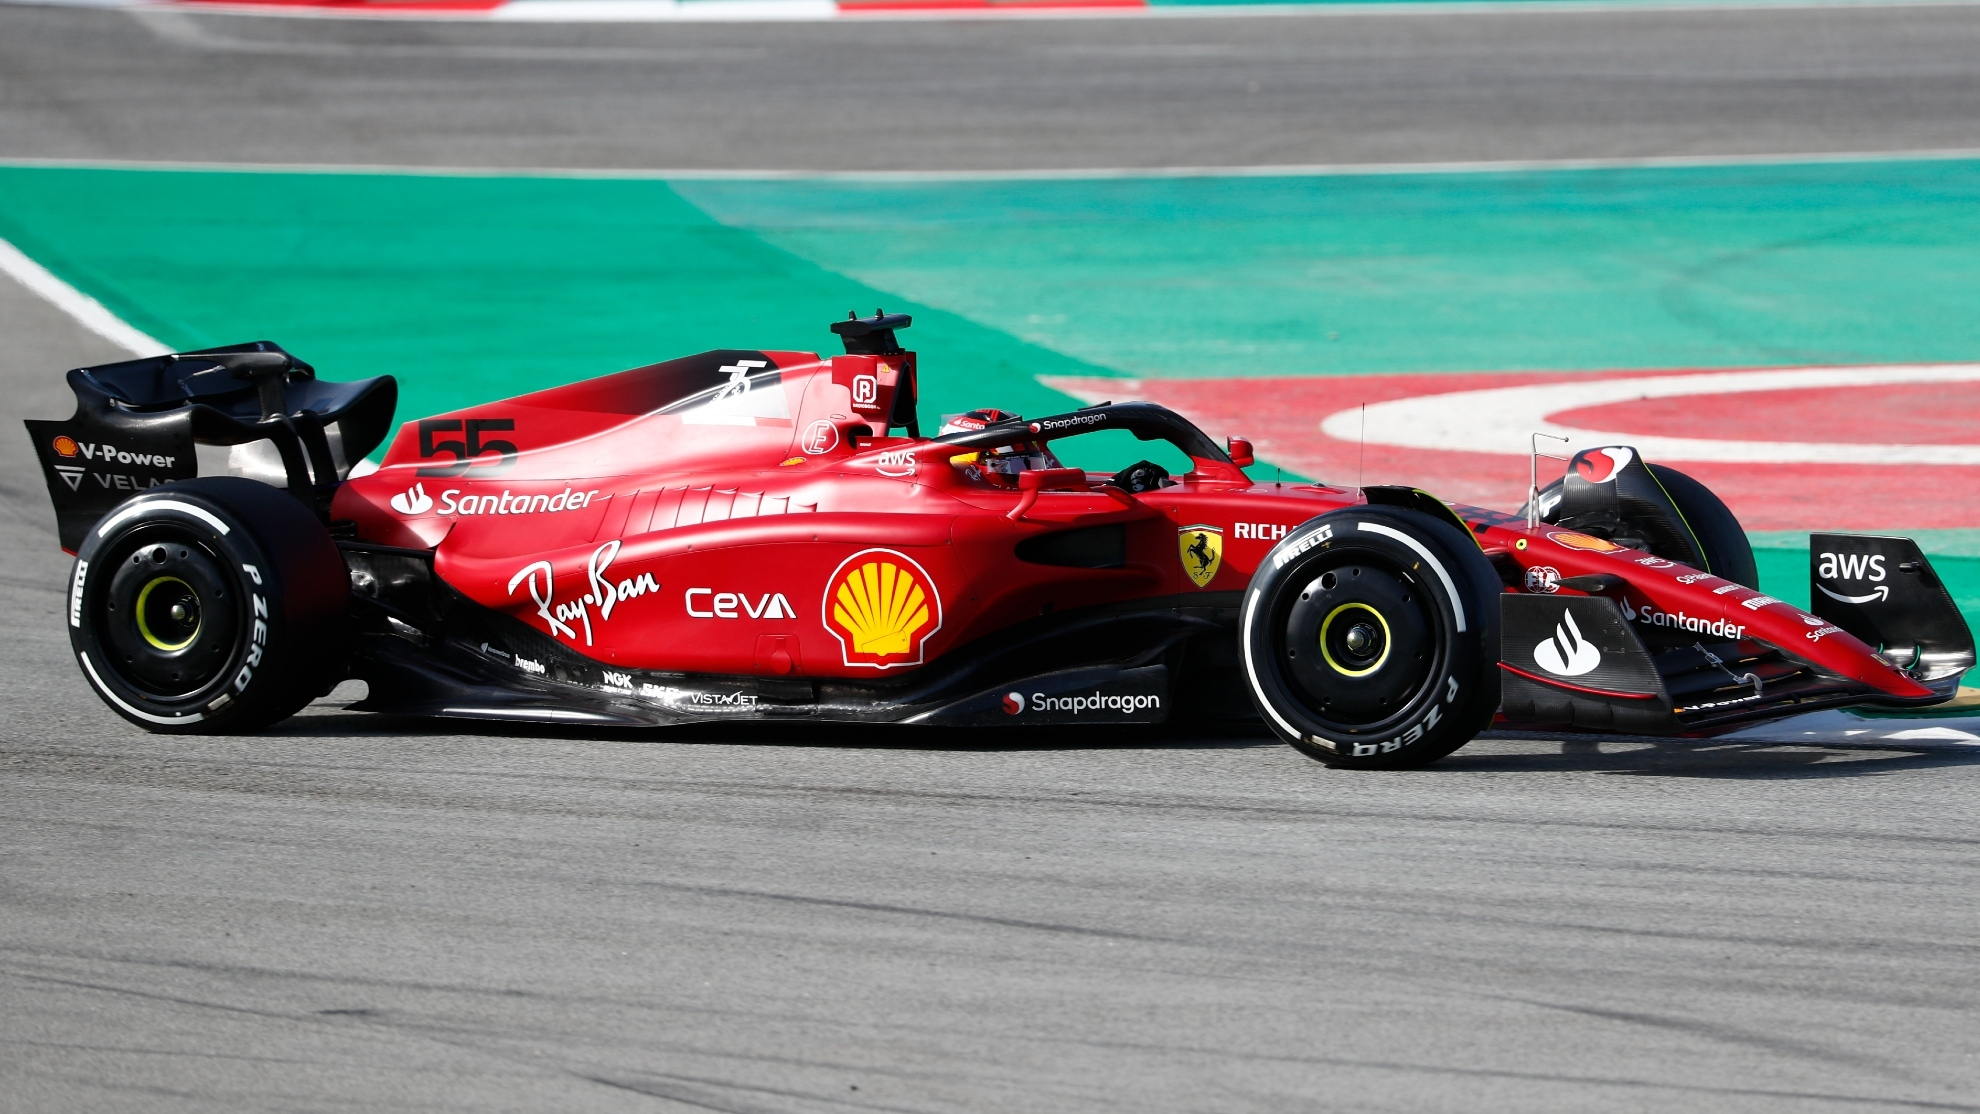

In [19]:
from IPython.display import Image
import os
Image('F1.jpg')

In [20]:
import plotly.graph_objects as go
from plotly.offline import iplot

In [21]:
#COUNTRIES WITH MORE WIN

fig = go.Figure(data=[go.Pie(labels=dfresulrac[(dfresulrac['position']== '1')].sort_values(by=['nationality_x'])['nationality_x'].unique(), 
                             values=dfresulrac[(dfresulrac['position']== '1')].groupby('nationality_x')['position'].value_counts(),hole=.3)])
fig.update_layout(title={
        'text': "Country with more wins",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
        template = "plotly_dark")
iplot(fig)

In [39]:
#constructors with more wins
fig = go.Figure(data=[go.Pie(labels=dfresulrac[(dfresulrac['position']== '1')].sort_values(by=['constructorRef'])['constructorRef'].unique(), 
                             values=dfresulrac[(dfresulrac['position']== '1')].groupby('constructorRef')['position'].value_counts(),hole=.01)])
fig.update_layout(title={
        'text': "Teams wise Counstructors win",
        'y':0.9,
        'x':0.3,
        'xanchor': 'center',
        'yanchor': 'top'}, 
        template = "plotly_dark")
iplot(fig)

In [23]:
#grand pix that hosted most number of races
fig = go.Figure(data=[go.Bar(
    x= racesDF['name'],
    y= racesDF['date'],
)])
fig.update_layout(title={
        'text': "grand pix that hosted most number of races",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
                  yaxis=dict(
                            title='date',
                            titlefont_size=16,
                            tickfont_size=14),
                  xaxis=dict(
                            title='grand pix',
                            titlefont_size=16,
                            tickfont_size=14),
                  template = "ggplot2"
                  )
iplot(fig)

In [24]:
#constructor championship over the years
def championship_cons(year):
    f1_rep = dfresulrac[(dfresulrac['year']== year)].groupby('constructorRef')['points'].sum().reset_index()
    f1_rep = f1_rep.sort_values(by=['points'],ascending=False)
    fig = go.Figure(data=[go.Bar(
    x=f1_rep['constructorRef'],
    y=f1_rep['points']
    )])
    fig.update_layout(title={
        'text': f"Constructors' Championship ranking of {year}",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
                  yaxis=dict(
                            title='Points',
                            titlefont_size=16,
                            tickfont_size=14),
                  xaxis=dict(
                            title='Constructor',
                            titlefont_size=16,
                            tickfont_size=14),
                  template = "plotly_dark"
                  )
    return iplot(fig)

In [25]:
championship_cons(2022)
championship_cons(2021)
championship_cons(2020)

In [26]:
#drivers with more podiums
p1 = dfresulrac[(dfresulrac['position']== '1')].groupby('driverRef')['position'].value_counts()
p2 = dfresulrac[(dfresulrac['position']== '2')].groupby('driverRef')['position'].value_counts()
p3 = dfresulrac[(dfresulrac['position']== '3')].groupby('driverRef')['position'].value_counts()
#pilotos = dfresulrac.sort_values(by=['driverRef'])['driverRef'].unique()
driver1 = dfresulrac[(dfresulrac['position']== '1')].sort_values(by=['driverRef'])['driverRef'].unique()
driver2 = dfresulrac[(dfresulrac['position']== '2')].sort_values(by=['driverRef'])['driverRef'].unique()
driver3 = dfresulrac[(dfresulrac['position']== '3')].sort_values(by=['driverRef'])['driverRef'].unique()

In [27]:
fig = go.Figure(go.Bar(x=driver1, y=p1, name='1º place'))
fig.add_trace(go.Bar(x=driver2, y=p2, name='2º place'))
fig.add_trace(go.Bar(x=driver3, y=p3, name='3º place'))

fig.update_layout(barmode='stack',title={
        'text': "driver with more podiums",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
                  yaxis=dict(
                            title='Podiums',
                            titlefont_size=16,
                            tickfont_size=14),
                  xaxis=dict(
                            title='Driver',
                            titlefont_size=16,
                            tickfont_size=14),
                  template = "plotly_dark"
                  )
iplot(fig)

In [28]:
nationality_counts = driversDF['nationality'].value_counts().to_frame().reset_index().rename(columns={'index':'nationality', 'nationality':'count'})
nationality_counts.head(20)

nationality  count
0         British    165
1        American    157
2         Italian     99
3          French     73
4          German     50
5       Brazilian     32
6       Argentine     24
7         Belgian     23
8           Swiss     23
9   South African     23
10       Japanese     20
11          Dutch     17
12     Australian     17
13       Austrian     15
14        Spanish     15
15       Canadian     14
16        Swedish     10
17        Finnish      9
18  New Zealander      9
19        Mexican      6

In [29]:
#Top 20 driver nationalities in F1
import plotly.express as px
fig = px.pie(nationality_counts.head(20), values='count', names='nationality', 
             title='Top 20 driver nationalities in F1', hole = 0.2,
            color_discrete_sequence=px.colors.qualitative.Pastel)

In [37]:
#F1 circuits across the globe
get_ipython().system('pip install folium')
import pandas as pd
import folium
coordinates=[]
for lat,lng in zip(circuitsDF['lat'],circuitsDF['lng']):
    coordinates.append([lat,lng])
maps = folium.Map(zoom_start=3,tiles='Stamen Toner')  #map_types (Stamen Terrain, Stamen Toner, Mapbox Bright, cartodbpositron)
for i,j in zip(coordinates,circuitsDF.name):
    marker = folium.Marker(
        location=i,
        icon=folium.Icon(icon="star",color='green'),
        popup="<strong>{0}</strong>".format(j))  #strong is used to bold the font (optional)
    marker.add_to(maps)
maps

In [31]:
sum_driver = dfresulrac.groupby(['year','driverRef'])['points'].sum().reset_index()
champions = sum_driver.loc[sum_driver.reset_index().groupby(['year'])['points'].idxmax()]
champions = champions['driverRef'].value_counts().reset_index()
champions.rename(columns={'index':'driver','driverRef':'titles'}, inplace = True)

In [32]:
fig = go.Figure(data=[go.Bar(
    x=champions['driver'],
    y=champions['titles']
    )])
fig.update_layout(title={
        'text': "Drivers with more titles",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, 
                  yaxis=dict(
                            title='Titles',
                            titlefont_size=16,
                            tickfont_size=14),
                  xaxis=dict(
                            title='Driver',
                            titlefont_size=16,
                            tickfont_size=14),
                  template = "plotly_dark"
                  )
iplot(fig)